## Pandas Tutorial 16: Working with Time Series Using DateTimeIndex
Time series analysis is a crucial aspect of fields like finance, economics, and data science. Pandas provides robust tools to handle time series data efficiently. In this tutorial, we wil introduce the **DateTimeIndex** and explore resampling techniques, laying the foundation for more advanced time series analysis.

#### Topics covered:
* **What is a Time Series?**
* **Introduction to DateTimeIndex**
* **Benefits of Using DateTimeIndex**
* **Resampling Time Series Data**
* **Plotting Time Series with `plot()`**

In [52]:
import pandas as pd

In [53]:
df = pd.read_csv("aapl.csv", parse_dates=["Date"], index_col="Date")
df.head(5)

C:\Users\Vaishob\AppData\Local\Temp\ipykernel_26384\1220643825.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("aapl.csv", parse_dates=["Date"], index_col="Date")


,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107


In [54]:
df.index

DatetimeIndex(['2017-07-07', '2017-07-06', '2017-07-05', '2017-07-03',
               '2017-06-30', '2017-06-29', '2017-06-28', '2017-06-27',
               '2017-06-26', '2017-06-23',
               ...
               '2016-07-22', '2016-07-21', '2016-07-20', '2016-07-19',
               '2016-07-18', '2016-07-15', '2016-07-14', '2016-07-13',
               '2016-07-12', '2016-07-11'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

## What is DatetimeIndex? Benefits of it
### (1) Partial Date Index: Selct Specific Months Data

In [55]:
df.loc['2017-06-30']

Open           144.45
High           144.96
Low            143.78
Close          144.02
Volume    23024107.00
Name: 2017-06-30 00:00:00, dtype: float64

In [56]:
df.loc["2017-01"]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-31,121.15,121.39,120.62,121.35,49200993
2017-01-30,120.93,121.63,120.66,121.63,30377503
2017-01-27,122.14,122.35,121.60,121.95,20562944
2017-01-26,121.67,122.44,121.60,121.94,26337576
2017-01-25,120.42,122.10,120.28,121.88,32586673
2017-01-24,119.55,120.10,119.50,119.97,23211038
2017-01-23,120.00,120.81,119.77,120.08,22050218
2017-01-20,120.45,120.45,119.73,120.00,32597892
2017-01-19,119.40,120.09,119.37,119.78,25597291


In [57]:
df.loc['2017-06'].head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-06-30,144.45,144.96,143.78,144.02,23024107
2017-06-29,144.71,145.13,142.28,143.68,31499368
2017-06-28,144.49,146.11,143.16,145.83,22082432
2017-06-27,145.01,146.16,143.62,143.73,24761891
2017-06-26,147.17,148.28,145.38,145.82,25692361


### Average price of aapl's stock in June, 2017

In [58]:
df.loc['2017-06'].Close.mean()

147.8313636363636

In [59]:
df.loc['2017'].head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782


#### (2) Select Date Range

In [60]:
# Sort the index in ascending order
df = df.sort_index()
df

,Open,High,Low,Close,Volume
Date,,,,,
2016-07-11,96.75,97.65,96.73,96.98,23794945
2016-07-12,97.17,97.70,97.12,97.42,24167463
2016-07-13,97.41,97.67,96.84,96.87,25892171
2016-07-14,97.39,98.99,97.32,98.79,38918997
2016-07-15,98.92,99.30,98.50,98.78,30136990
...,...,...,...,...,...
2017-06-30,144.45,144.96,143.78,144.02,23024107
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-07-05,143.69,144.79,142.72,144.09,21569557


In [61]:
df.loc['2017-01-03':'2017-01-08']

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,115.80,116.33,114.76,116.15,28781865
2017-01-04,115.85,116.51,115.75,116.02,21118116
2017-01-05,115.92,116.86,115.81,116.61,22193587
2017-01-06,116.78,118.16,116.47,117.91,31751900


In [62]:
df.loc['2017'].head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,115.80,116.33,114.76,116.15,28781865
2017-01-04,115.85,116.51,115.75,116.02,21118116


In [63]:
df.loc['2017-01']

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,115.80,116.33,114.76,116.15,28781865
2017-01-04,115.85,116.51,115.75,116.02,21118116
2017-01-05,115.92,116.86,115.81,116.61,22193587
2017-01-06,116.78,118.16,116.47,117.91,31751900
2017-01-09,117.95,119.43,117.94,118.99,33561948
2017-01-10,118.77,119.38,118.30,119.11,24462051
2017-01-11,118.74,119.93,118.60,119.75,27588593
2017-01-12,118.90,119.30,118.21,119.25,27086220
2017-01-13,119.11,119.62,118.81,119.04,26111948


### Resampling

In [64]:
df['Close'].resample('M').mean().head()

Date
2016-07-31     99.473333
2016-08-31    107.665217
2016-09-30    110.857143
2016-10-31    115.707143
2016-11-30    110.154286
Freq: M, Name: Close, dtype: float64

In [65]:
df.loc['2016-07']

,Open,High,Low,Close,Volume
Date,,,,,
2016-07-11,96.75,97.65,96.73,96.98,23794945
2016-07-12,97.17,97.70,97.12,97.42,24167463
2016-07-13,97.41,97.67,96.84,96.87,25892171
2016-07-14,97.39,98.99,97.32,98.79,38918997
2016-07-15,98.92,99.30,98.50,98.78,30136990
2016-07-18,98.70,100.13,98.60,99.83,36493867
2016-07-19,99.56,100.00,99.34,99.87,23779924
2016-07-20,100.00,100.46,99.74,99.96,26275968
2016-07-21,99.83,101.00,99.13,99.43,32702028


<Axes: xlabel='Date'>

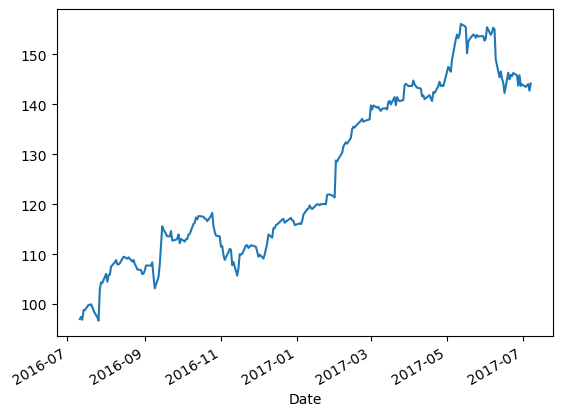

In [66]:
%matplotlib inline
df['Close'].plot()

<Axes: xlabel='Date'>

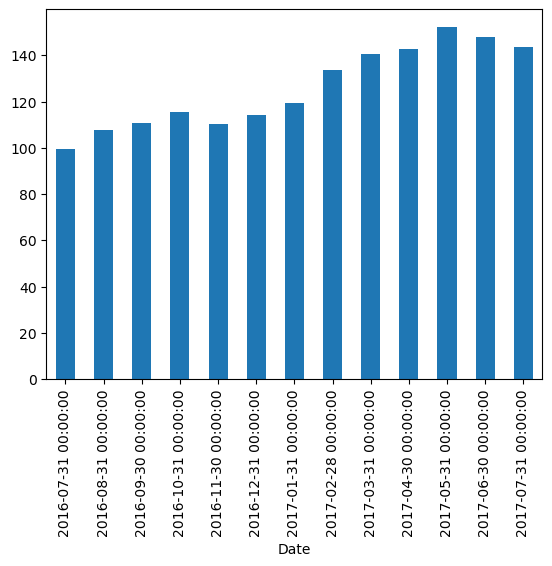

In [67]:
df['Close'].resample('M').mean().plot(kind='bar')